# 20490033 - ERAY ÖKSÜZ - NESNE YÖNELİMLİ PROGRAMI VİZE
## İstanbul Kadıköy İlçesinde Satılan Dairelerin Fiyatları

### Verilerin alınması ve analiz edilmesi

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("kadikoy_ev_data.csv", sep=";")

In [3]:
df

,Unnamed: 0,price,floor_area,age,floor,roof,room_num,hall_num,neighborhood
0,0,2300000,75,0,14,0,1,1,SahrayıCedit Mahallesi
1,1,4690000,165,17,5,0,3,1,Feneryolu Mahallesi
2,2,6500000,145,5,7,0,3,1,Göztepe Mahallesi
3,3,6300000,165,15,10,0,3,1,Göztepe Mahallesi
4,4,5500000,145,12,1,0,3,1,Göztepe Mahallesi
...,...,...,...,...,...,...,...,...,...
4137,4137,9500000,215,0,9,0,4,1,Suadiye Mahallesi
4138,4138,12120000,200,0,10,0,4,1,Suadiye Mahallesi
4139,4139,4300000,200,2,8,0,4,1,Erenköy Mahallesi
4140,4140,10400000,110,0,10,0,3,1,Suadiye Mahallesi


In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    4142 non-null   int64 
 1   price         4142 non-null   int64 
 2   floor_area    4142 non-null   int64 
 3   age           4142 non-null   int64 
 4   floor         4142 non-null   int64 
 5   roof          4142 non-null   int64 
 6   room_num      4142 non-null   int64 
 7   hall_num      4142 non-null   int64 
 8   neighborhood  4142 non-null   object
dtypes: int64(8), object(1)
memory usage: 291.4+ KB


# İstatistikler
## Mahallere Göre Satılan Daire Sayısı ve Satış Fiyat Ortalaması

In [5]:
mahalleler = df["neighborhood"].unique()
print(mahalleler)

['SahrayıCedit Mahallesi' 'Feneryolu Mahallesi' 'Göztepe Mahallesi'
 'Kozyatağı Mahallesi' 'Bostancı Mahallesi' 'Suadiye Mahallesi'
 'Fenerbahçe Mahallesi' 'Erenköy Mahallesi' 'Caddebostan Mahallesi'
 'Merdivenköy Mahallesi' '19 Mayıs Mahallesi' 'Zühtüpaşa Mahallesi'
 'Dumlupınar Mahallesi' 'Fikirtepe Mahallesi' 'Caferağa Mahallesi'
 'Acıbadem Mahallesi' 'Rasimpaşa Mahallesi' 'Hasanpaşa Mahallesi'
 'Eğitim Mahallesi' 'Osmanağa Mahallesi' 'Koşuyolu Mahallesi']


In [6]:
fiyat_ortalama = []
satilan_daire = []
for m in mahalleler:
    x=df[ df["neighborhood"]==m ]
    ortalama=round(sum(x["price"])/len(x))
    fiyat_ortalama.append(ortalama)
    satilan_daire.append(len(x))

istatistik_data=pd.DataFrame({"mahalleler":mahalleler,"satilan_daire":satilan_daire, "fiyat_ortalama": fiyat_ortalama})
istatistik_data

,mahalleler,satilan_daire,fiyat_ortalama
0,SahrayıCedit Mahallesi,48,2715625
1,Feneryolu Mahallesi,285,3870333
2,Göztepe Mahallesi,553,4877477
3,Kozyatağı Mahallesi,110,3466091
4,Bostancı Mahallesi,285,4972333
5,Suadiye Mahallesi,750,6363780
6,Fenerbahçe Mahallesi,488,7969609
7,Erenköy Mahallesi,600,4569050
8,Caddebostan Mahallesi,518,8581515
9,Merdivenköy Mahallesi,131,2820702


In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter

### Mahallelere Göre Satılan Daire Sayısı

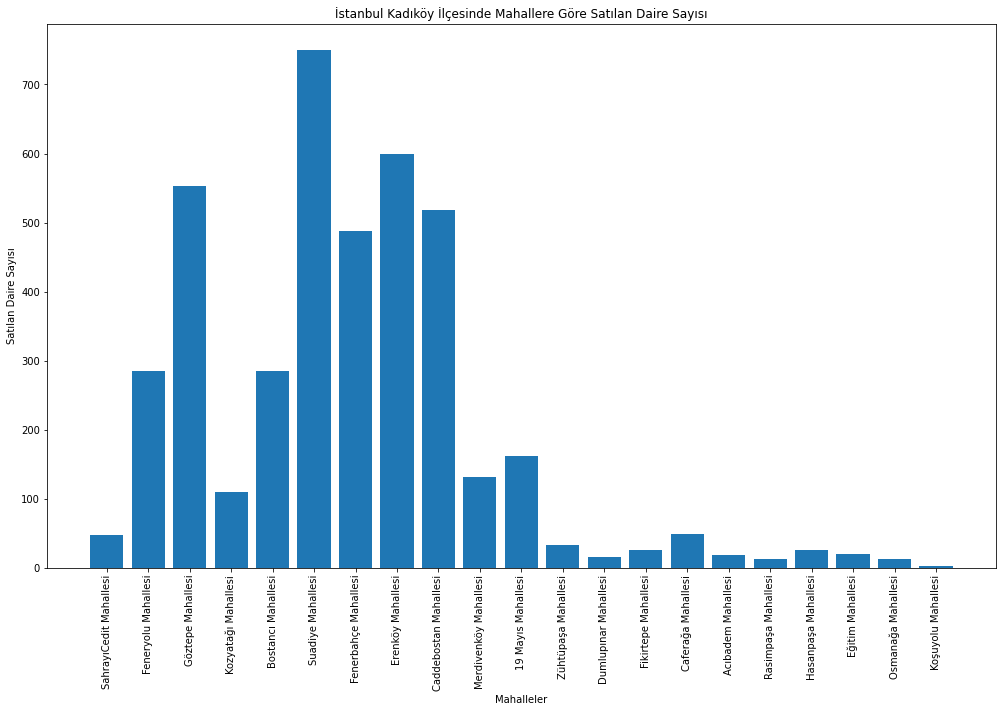

In [8]:
plt.figure(figsize=(17,10))
plt.title("İstanbul Kadıköy İlçesinde Mahallere Göre Satılan Daire Sayısı")
plt.bar(istatistik_data["mahalleler"], istatistik_data["satilan_daire"])
plt.xlabel("Mahalleler")
plt.ylabel("Satılan Daire Sayısı")
plt.xticks(rotation=90)
plt.show()

### Mahallelere Göre Satılan Dairelerin Fiyat Ortalaması

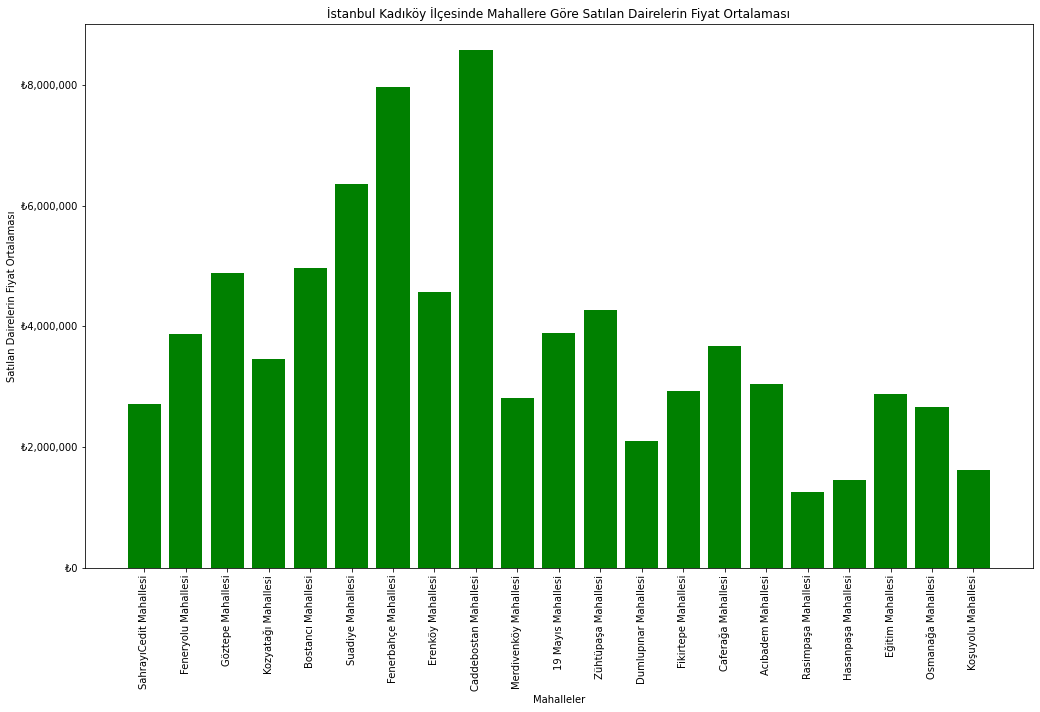

In [9]:
plt.figure(figsize=(17,10))
plt.title("İstanbul Kadıköy İlçesinde Mahallere Göre Satılan Dairelerin Fiyat Ortalaması")
plt.bar(istatistik_data["mahalleler"], istatistik_data["fiyat_ortalama"], color="green")
plt.xlabel("Mahalleler")
plt.ylabel("Satılan Dairelerin Fiyat Ortalaması")
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₺{x:,.0f}'))
plt.show()

## MAHALLERE GÖRE SATILAN DAİRE ADETİNE GÖRE GETİREN KAZANÇ KARŞILAŞTIRMASI

In [10]:
istatistik_k = istatistik_data
istatistik_k["fiyat_ortalama"] = istatistik_k["fiyat_ortalama"]/max(istatistik_k["fiyat_ortalama"])
istatistik_k["satilan_daire"] = istatistik_k["satilan_daire"]/max(istatistik_k["satilan_daire"])
istatistik_k

,mahalleler,satilan_daire,fiyat_ortalama
0,SahrayıCedit Mahallesi,0.064000,0.316451
1,Feneryolu Mahallesi,0.380000,0.451008
2,Göztepe Mahallesi,0.737333,0.568370
3,Kozyatağı Mahallesi,0.146667,0.403902
4,Bostancı Mahallesi,0.380000,0.579424
5,Suadiye Mahallesi,1.000000,0.741568
6,Fenerbahçe Mahallesi,0.650667,0.928695
7,Erenköy Mahallesi,0.800000,0.532429
8,Caddebostan Mahallesi,0.690667,1.000000
9,Merdivenköy Mahallesi,0.174667,0.328695


### Çizgi Grafiği İle Karşılaştırma

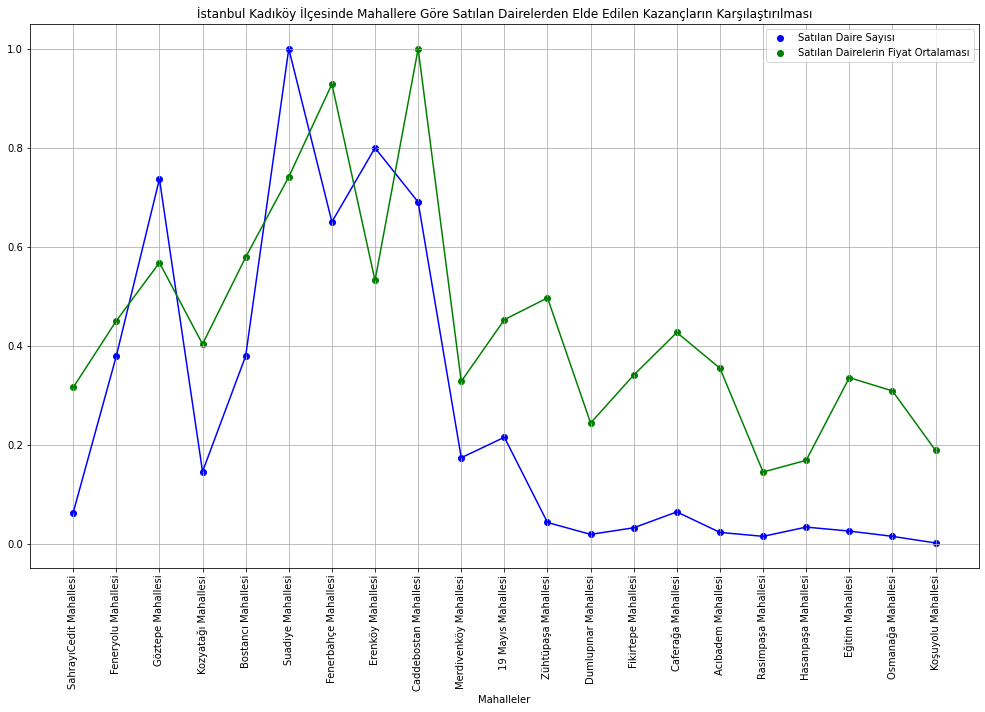

In [11]:
plt.figure(figsize=(17,10))
plt.title("İstanbul Kadıköy İlçesinde Mahallere Göre Satılan Dairelerden Elde Edilen Kazançların Karşılaştırılması")
plt.scatter(istatistik_k["mahalleler"], istatistik_k["satilan_daire"], color="blue", label="Satılan Daire Sayısı")
plt.plot(istatistik_k["mahalleler"], istatistik_k["satilan_daire"], color="blue")
plt.scatter(istatistik_k["mahalleler"], istatistik_k["fiyat_ortalama"], color="green", label="Satılan Dairelerin Fiyat Ortalaması")
plt.plot(istatistik_k["mahalleler"], istatistik_k["fiyat_ortalama"], color="green")
plt.xlabel("Mahalleler")
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

### Bar Grafiği İle Karşılaştırma

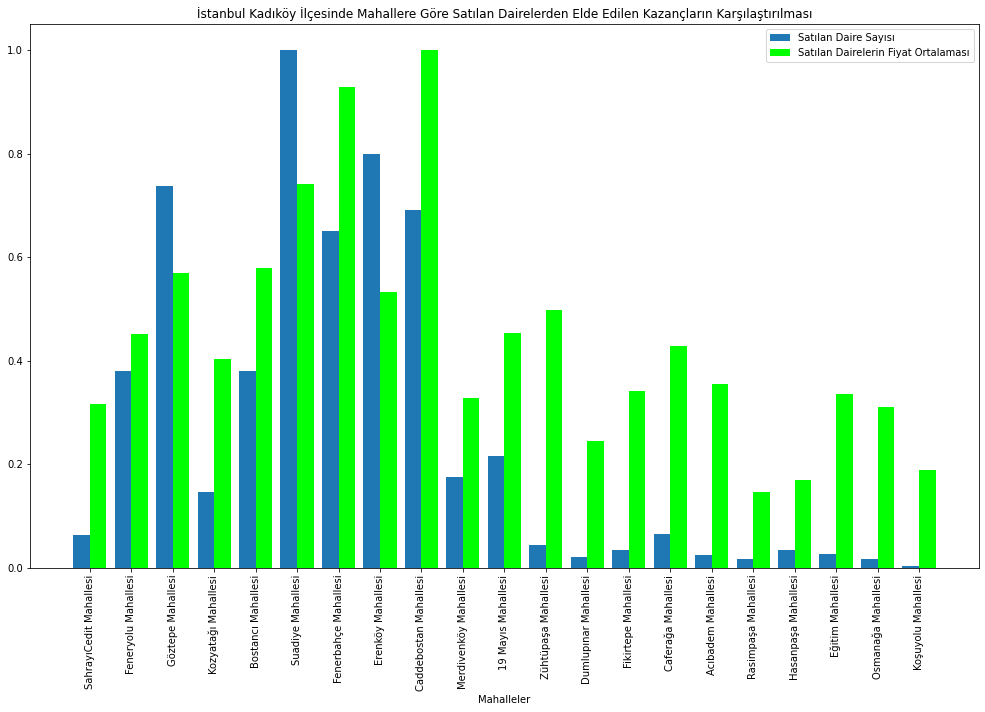

In [12]:
X_mahalleler_axis = np.arange(len(istatistik_k["mahalleler"]))

plt.figure(figsize=(17,10))
plt.bar(X_mahalleler_axis - 0.2, istatistik_k["satilan_daire"], 0.4, label = "Satılan Daire Sayısı")
plt.bar(X_mahalleler_axis + 0.2, istatistik_k["fiyat_ortalama"], 0.4, color="lime", label = "Satılan Dairelerin Fiyat Ortalaması")
  
plt.xticks(X_mahalleler_axis, istatistik_k["mahalleler"], rotation=90)
plt.xlabel("Mahalleler")
plt.title("İstanbul Kadıköy İlçesinde Mahallere Göre Satılan Dairelerden Elde Edilen Kazançların Karşılaştırılması")
plt.legend()
plt.show()

## Oda ve Salon Sayısına Göre Fiyat Ortalaması
### Verilerin incelenmesi

In [13]:
df["room_num"].unique()

array([1, 3, 2, 4, 6, 5, 7, 8])

In [14]:
df["room_num"].value_counts()

3    2501
4     798
2     555
5     159
1      72
6      38
8      16
7       3
Name: room_num, dtype: int64

In [15]:
df["hall_num"].unique()

array([1, 2, 0, 3, 4])

In [16]:
df["hall_num"].value_counts()

1    3811
2     325
0       3
3       2
4       1
Name: hall_num, dtype: int64

In [17]:
salon_ve_oda = []
for i in range(len(df["hall_num"])):
    salon_ve_oda.append(str(df["room_num"][i]) + "+" + str(df["hall_num"][i]))

df["room_hall_num"] = salon_ve_oda
df

,Unnamed: 0,price,floor_area,age,floor,roof,room_num,hall_num,neighborhood,room_hall_num
0,0,2300000,75,0,14,0,1,1,SahrayıCedit Mahallesi,1+1
1,1,4690000,165,17,5,0,3,1,Feneryolu Mahallesi,3+1
2,2,6500000,145,5,7,0,3,1,Göztepe Mahallesi,3+1
3,3,6300000,165,15,10,0,3,1,Göztepe Mahallesi,3+1
4,4,5500000,145,12,1,0,3,1,Göztepe Mahallesi,3+1
...,...,...,...,...,...,...,...,...,...,...
4137,4137,9500000,215,0,9,0,4,1,Suadiye Mahallesi,4+1
4138,4138,12120000,200,0,10,0,4,1,Suadiye Mahallesi,4+1
4139,4139,4300000,200,2,8,0,4,1,Erenköy Mahallesi,4+1
4140,4140,10400000,110,0,10,0,3,1,Suadiye Mahallesi,3+1


In [18]:
room_hall_num = df["room_hall_num"].unique()
room_hall_num

array(['1+1', '3+1', '2+1', '4+1', '4+2', '6+2', '5+2', '7+2', '3+2',
       '8+2', '5+1', '6+1', '2+2', '1+0', '7+1', '2+3', '3+3', '1+2',
       '8+1', '3+4'], dtype=object)

In [19]:
df["room_hall_num"].value_counts()

3+1    2445
4+1     655
2+1     547
4+2     143
5+1      87
5+2      72
1+1      68
3+2      54
6+2      31
8+2      15
6+1       7
2+2       7
1+0       3
7+2       2
7+1       1
2+3       1
3+3       1
1+2       1
8+1       1
3+4       1
Name: room_hall_num, dtype: int64

In [20]:
fiyat_ortalama2 = []
daire_sayisi = []
for rhm in room_hall_num:
    x=df[ df["room_hall_num"]==rhm ]
    ortalama=round(sum(x["price"])/len(x))
    fiyat_ortalama2.append(ortalama)
    daire_sayisi.append(len(x))

istatistik_data2 = pd.DataFrame({"room_hall_num":room_hall_num, "daire_sayisi": daire_sayisi, "fiyat_ortalama":fiyat_ortalama2})
istatistik_data2

,room_hall_num,daire_sayisi,fiyat_ortalama
0,1+1,68,1732426
1,3+1,2445,4835299
2,2+1,547,2961984
3,4+1,655,7678947
4,4+2,143,8751503
5,6+2,31,14337097
6,5+2,72,14527431
7,7+2,2,14000000
8,3+2,54,7850741
9,8+2,15,14099333


## Oda ve Salon Sayısına Göre Satılan Dairelerin Sayısı

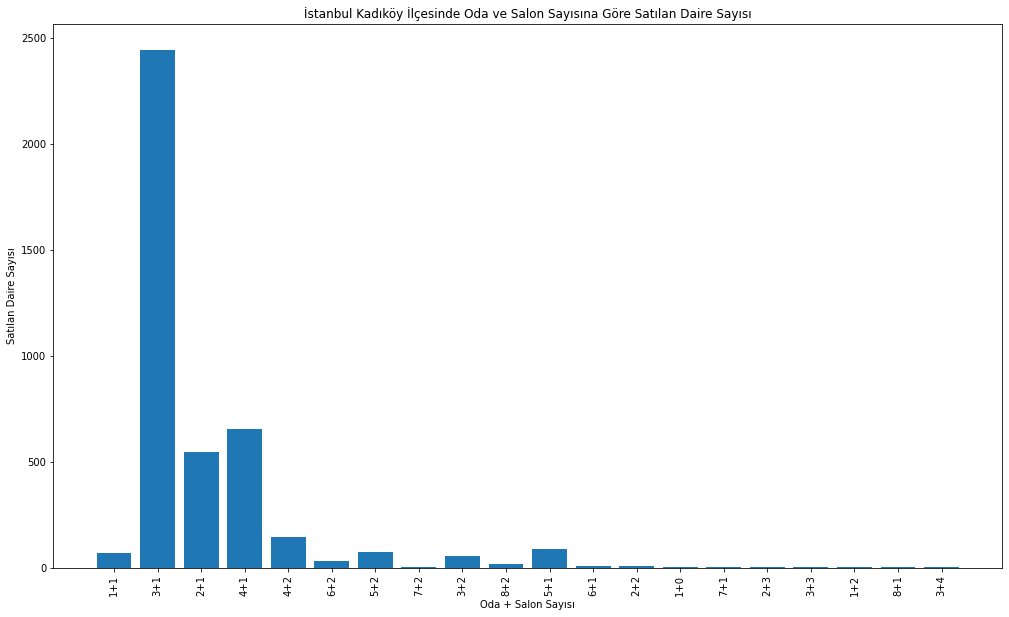

In [21]:
plt.figure(figsize=(17,10))
plt.title("İstanbul Kadıköy İlçesinde Oda ve Salon Sayısına Göre Satılan Daire Sayısı")
plt.bar(istatistik_data2["room_hall_num"], istatistik_data2["daire_sayisi"])
plt.xlabel("Oda + Salon Sayısı")
plt.ylabel("Satılan Daire Sayısı")
plt.xticks(rotation=90)
plt.show()

## Oda ve Salon Sayısına Göre Satılan Dairelerin Fiyat Ortalaması

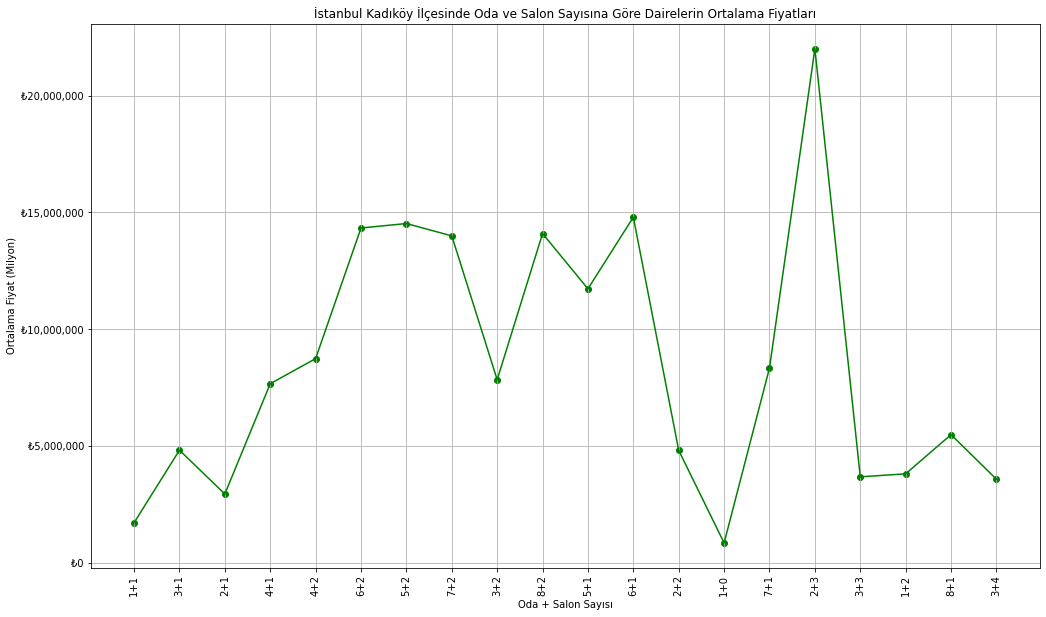

In [22]:
plt.figure(figsize=(17,10))
plt.title("İstanbul Kadıköy İlçesinde Oda ve Salon Sayısına Göre Dairelerin Ortalama Fiyatları")
plt.scatter(istatistik_data2["room_hall_num"], istatistik_data2["fiyat_ortalama"], color="green")
plt.plot(istatistik_data2["room_hall_num"], istatistik_data2["fiyat_ortalama"], color="green")
plt.xlabel("Oda + Salon Sayısı")
plt.ylabel("Ortalama Fiyat (Milyon)")
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₺{x:,.0f}'))
plt.grid(True)
plt.show()

## ODA ve SALON SAYISINA GÖRE SATILAN DAİRE EDETİNE GÖRE GETİREN KAZANÇ KARŞILAŞTIRMASI

In [23]:
istatistik_k2 = istatistik_data2
istatistik_k2["fiyat_ortalama"] = istatistik_k2["fiyat_ortalama"]/max(istatistik_k2["fiyat_ortalama"])
istatistik_k2["daire_sayisi"] = istatistik_k2["daire_sayisi"]/max(istatistik_k2["daire_sayisi"])
istatistik_k2

,room_hall_num,daire_sayisi,fiyat_ortalama
0,1+1,0.027812,0.078747
1,3+1,1.000000,0.219786
2,2+1,0.223722,0.134636
3,4+1,0.267894,0.349043
4,4+2,0.058487,0.397796
5,6+2,0.012679,0.651686
6,5+2,0.029448,0.660338
7,7+2,0.000818,0.636364
8,3+2,0.022086,0.356852
9,8+2,0.006135,0.640879


### Çizgi Grafiği İle Karşılaştırma

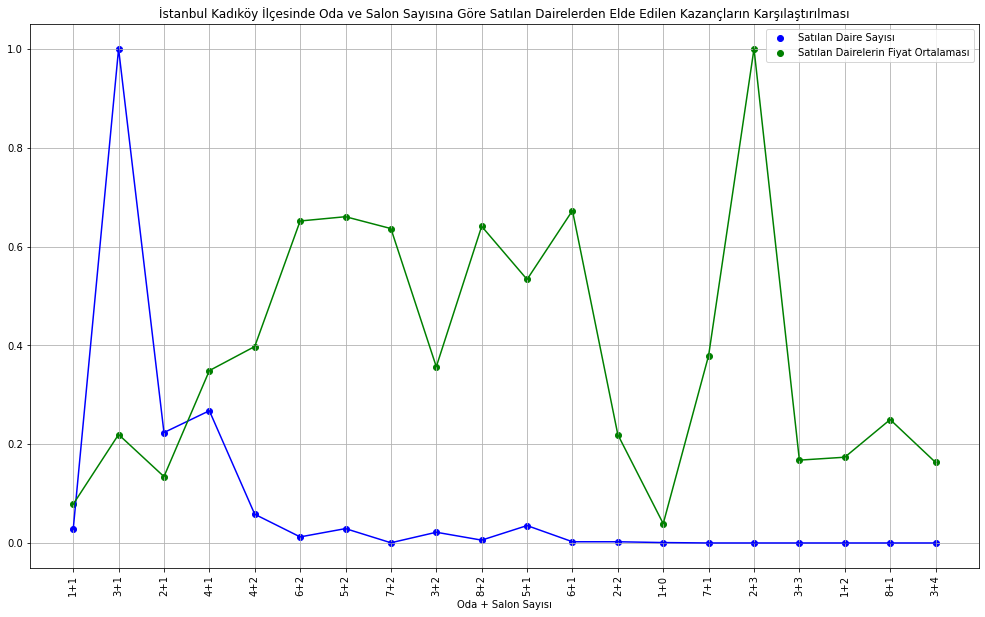

In [24]:
plt.figure(figsize=(17,10))
plt.title("İstanbul Kadıköy İlçesinde Oda ve Salon Sayısına Göre Satılan Dairelerden Elde Edilen Kazançların Karşılaştırılması")
plt.scatter(istatistik_k2["room_hall_num"], istatistik_k2["daire_sayisi"], color="blue", label="Satılan Daire Sayısı")
plt.plot(istatistik_k2["room_hall_num"], istatistik_k2["daire_sayisi"], color="blue")
plt.scatter(istatistik_k2["room_hall_num"], istatistik_k2["fiyat_ortalama"], color="green", label="Satılan Dairelerin Fiyat Ortalaması")
plt.plot(istatistik_k2["room_hall_num"], istatistik_k2["fiyat_ortalama"], color="green")
plt.xlabel("Oda + Salon Sayısı")
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

### Sütun Grafiği İle Karşılaştırma

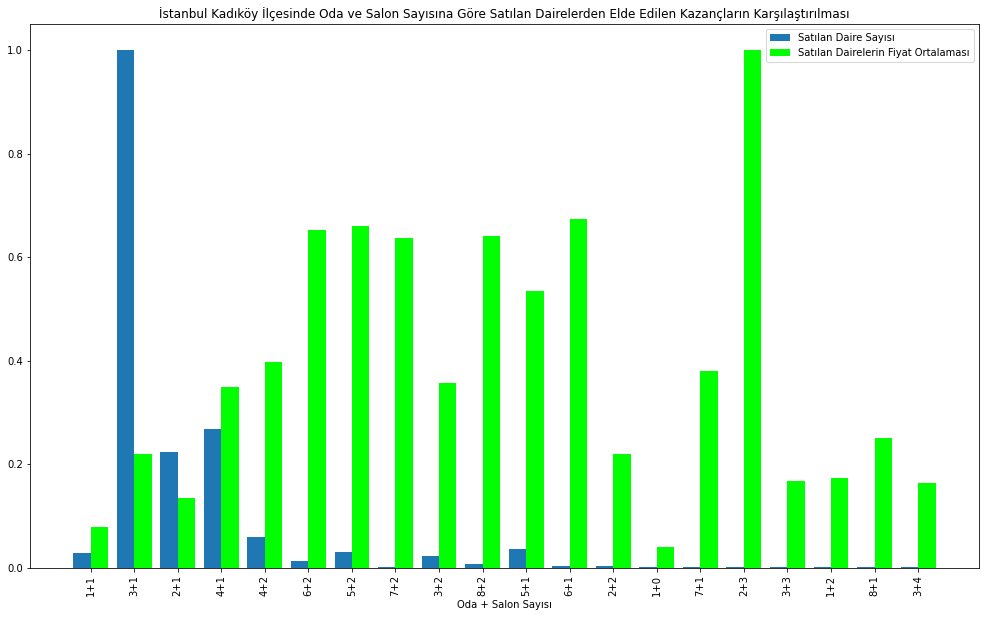

In [25]:
X_room_hall_num_axis = np.arange(len(istatistik_k2["room_hall_num"]))

plt.figure(figsize=(17,10))
plt.bar(X_room_hall_num_axis - 0.2, istatistik_k2["daire_sayisi"], 0.4, label = "Satılan Daire Sayısı")
plt.bar(X_room_hall_num_axis + 0.2, istatistik_k2["fiyat_ortalama"], 0.4, color="lime", label = "Satılan Dairelerin Fiyat Ortalaması")
plt.xticks(X_room_hall_num_axis, istatistik_k2["room_hall_num"], rotation=90)
plt.xlabel("Oda + Salon Sayısı")
plt.title("İstanbul Kadıköy İlçesinde Oda ve Salon Sayısına Göre Satılan Dairelerden Elde Edilen Kazançların Karşılaştırılması")
plt.legend()
plt.show()

# Mahallelere Göre Dairelerin Oda ve Salon Sayısı

### Grafik için verilerin analizi ve hazırlanması

In [26]:
mahalleler

array(['SahrayıCedit Mahallesi', 'Feneryolu Mahallesi',
       'Göztepe Mahallesi', 'Kozyatağı Mahallesi', 'Bostancı Mahallesi',
       'Suadiye Mahallesi', 'Fenerbahçe Mahallesi', 'Erenköy Mahallesi',
       'Caddebostan Mahallesi', 'Merdivenköy Mahallesi',
       '19 Mayıs Mahallesi', 'Zühtüpaşa Mahallesi',
       'Dumlupınar Mahallesi', 'Fikirtepe Mahallesi',
       'Caferağa Mahallesi', 'Acıbadem Mahallesi', 'Rasimpaşa Mahallesi',
       'Hasanpaşa Mahallesi', 'Eğitim Mahallesi', 'Osmanağa Mahallesi',
       'Koşuyolu Mahallesi'], dtype=object)

In [27]:
istatistik_data3 = pd.DataFrame(columns = df["room_hall_num"].unique())
istatistik_data3.insert(0, "mahalleler", mahalleler)
istatistik_data3.fillna(0, inplace=True)
istatistik_data3

,mahalleler,1+1,3+1,2+1,4+1,4+2,6+2,5+2,7+2,3+2,...,5+1,6+1,2+2,1+0,7+1,2+3,3+3,1+2,8+1,3+4
0,SahrayıCedit Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Feneryolu Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Göztepe Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kozyatağı Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bostancı Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Suadiye Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Fenerbahçe Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Erenköy Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Caddebostan Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Merdivenköy Mahallesi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
for m in range(len(istatistik_data3["mahalleler"])):
    for i in range(len(df["neighborhood"])):
        if istatistik_data3["mahalleler"][m] == df.loc[i, "neighborhood"]:
            istatistik_data3.loc[m, df.loc[i, "room_hall_num"]] += 1

istatistik_data3

,mahalleler,1+1,3+1,2+1,4+1,4+2,6+2,5+2,7+2,3+2,...,5+1,6+1,2+2,1+0,7+1,2+3,3+3,1+2,8+1,3+4
0,SahrayıCedit Mahallesi,3,29,12,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Feneryolu Mahallesi,3,168,60,49,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,Göztepe Mahallesi,3,357,75,81,8,0,9,0,9,...,10,0,0,0,0,0,0,1,0,0
3,Kozyatağı Mahallesi,5,60,17,15,8,0,1,0,0,...,4,0,0,0,0,0,0,0,0,0
4,Bostancı Mahallesi,7,179,33,37,14,0,10,0,2,...,1,0,0,0,0,1,1,0,0,0
5,Suadiye Mahallesi,3,420,113,89,60,4,9,0,8,...,38,3,3,0,0,0,0,0,0,0
6,Fenerbahçe Mahallesi,2,245,51,135,11,19,9,0,1,...,14,0,1,0,0,0,0,0,0,0
7,Erenköy Mahallesi,0,464,48,65,4,0,5,0,7,...,6,0,1,0,0,0,0,0,0,0
8,Caddebostan Mahallesi,2,250,34,137,27,5,22,2,12,...,8,2,0,0,1,0,0,0,1,0
9,Merdivenköy Mahallesi,1,94,30,5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


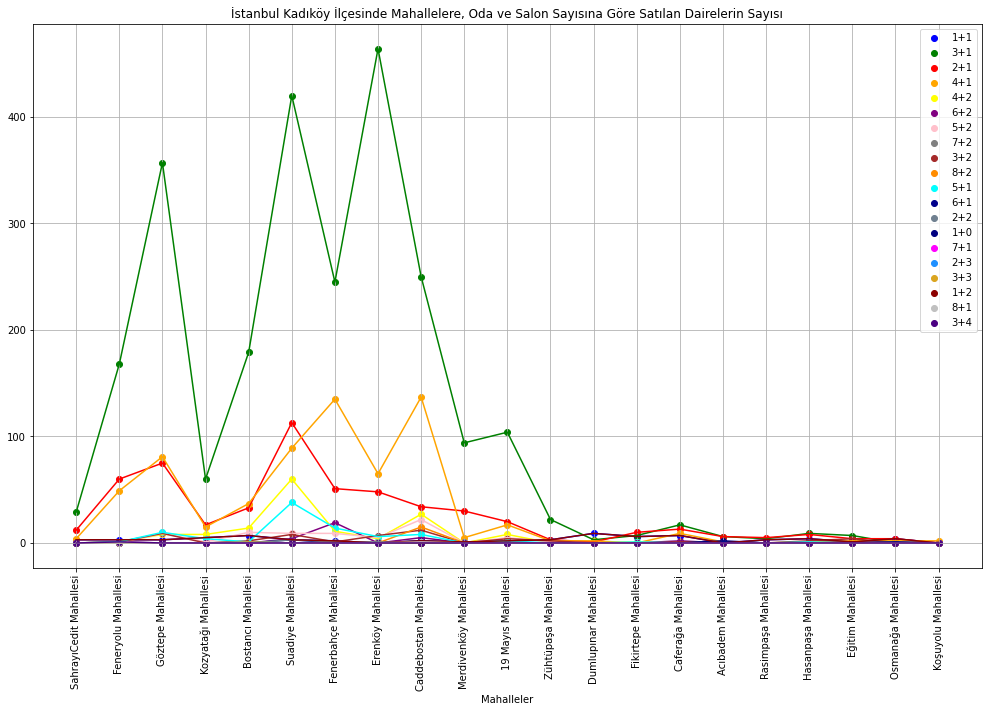

In [29]:
plt.figure(figsize=(17,10))
plt.title("İstanbul Kadıköy İlçesinde Mahallelere, Oda ve Salon Sayısına Göre Satılan Dairelerin Sayısı")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["1+1"], color="blue", label="1+1")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["1+1"], color="blue")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["3+1"], color="green", label="3+1")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["3+1"], color="green")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["2+1"], color="red", label="2+1")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["2+1"], color="red")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["4+1"], color="orange", label="4+1")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["4+1"], color="orange")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["4+2"], color="yellow", label="4+2")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["4+2"], color="yellow")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["6+2"], color="purple", label="6+2")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["6+2"], color="purple")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["5+2"], color="pink", label="5+2")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["5+2"], color="pink")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["7+2"], color="gray", label="7+2")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["7+2"], color="gray")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["3+2"], color="brown", label="3+2")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["3+2"], color="brown")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["8+2"], color="darkorange", label="8+2")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["8+2"], color="darkorange")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["5+1"], color="cyan", label="5+1")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["5+1"], color="cyan")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["6+1"], color="darkblue", label="6+1")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["6+1"], color="darkblue")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["2+2"], color="slategray", label="2+2")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["2+2"], color="slategray")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["1+0"], color="navy", label="1+0")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["1+0"], color="navy")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["7+1"], color="magenta", label="7+1")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["7+1"], color="magenta")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["2+3"], color="dodgerblue", label="2+3")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["2+3"], color="dodgerblue")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["3+3"], color="goldenrod", label="3+3")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["3+3"], color="goldenrod")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["1+2"], color="darkred", label="1+2")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["1+1"], color="darkred")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["8+1"], color="silver", label="8+1")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["8+1"], color="silver")
plt.scatter(istatistik_data3["mahalleler"], istatistik_data3["3+4"], color="indigo", label="3+4")
plt.plot(istatistik_data3["mahalleler"], istatistik_data3["3+4"], color="indigo")
plt.xlabel("Mahalleler")
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

### Suadiye Mahallesi Oda ve Salon Sayısına Göre Satılan Dairelerin Bar Grafiği İle Gösterimi

In [30]:
suadiye_istatistik = istatistik_data3.loc[5,:]
suadiye_istatistik.pop("mahalleler")
suadiye_istatistik

1+1      3
3+1    420
2+1    113
4+1     89
4+2     60
6+2      4
5+2      9
7+2      0
3+2      8
8+2      0
5+1     38
6+1      3
2+2      3
1+0      0
7+1      0
2+3      0
3+3      0
1+2      0
8+1      0
3+4      0
Name: 5, dtype: object

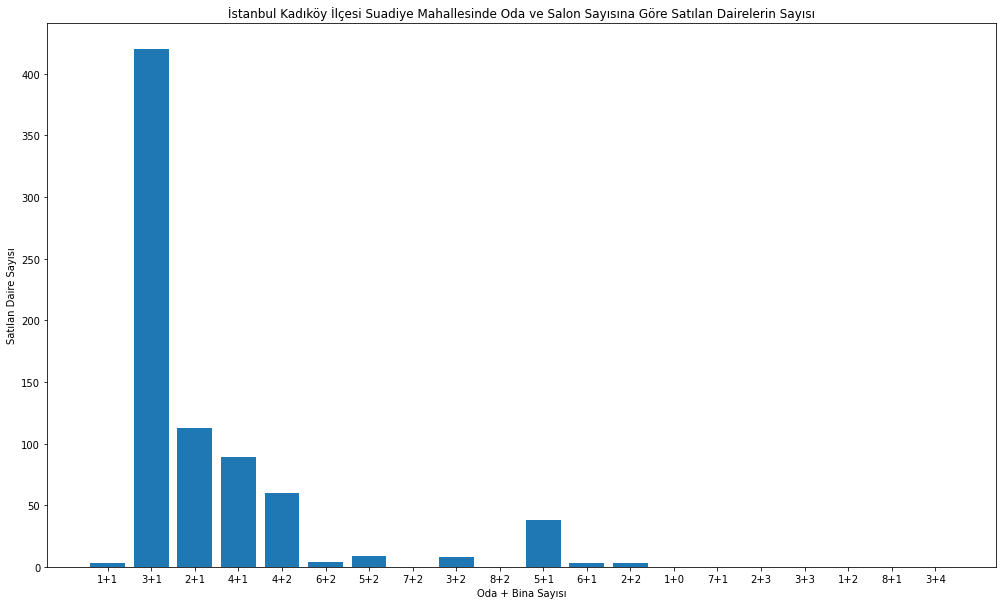

In [31]:
plt.figure(figsize=(17,10))
plt.bar(suadiye_istatistik.keys(), suadiye_istatistik)
plt.xlabel("Oda + Bina Sayısı")
plt.ylabel("Satılan Daire Sayısı")
plt.title("İstanbul Kadıköy İlçesi Suadiye Mahallesinde Oda ve Salon Sayısına Göre Satılan Dairelerin Sayısı")
plt.show()

### Suadiye Mahallesi Oda ve Salon Sayısına Göre Satılan Dairelerin Pasta Grafiği İle Gösterimi

In [32]:
for i in suadiye_istatistik.keys():
    if suadiye_istatistik[i] == 0:
        del suadiye_istatistik[i]

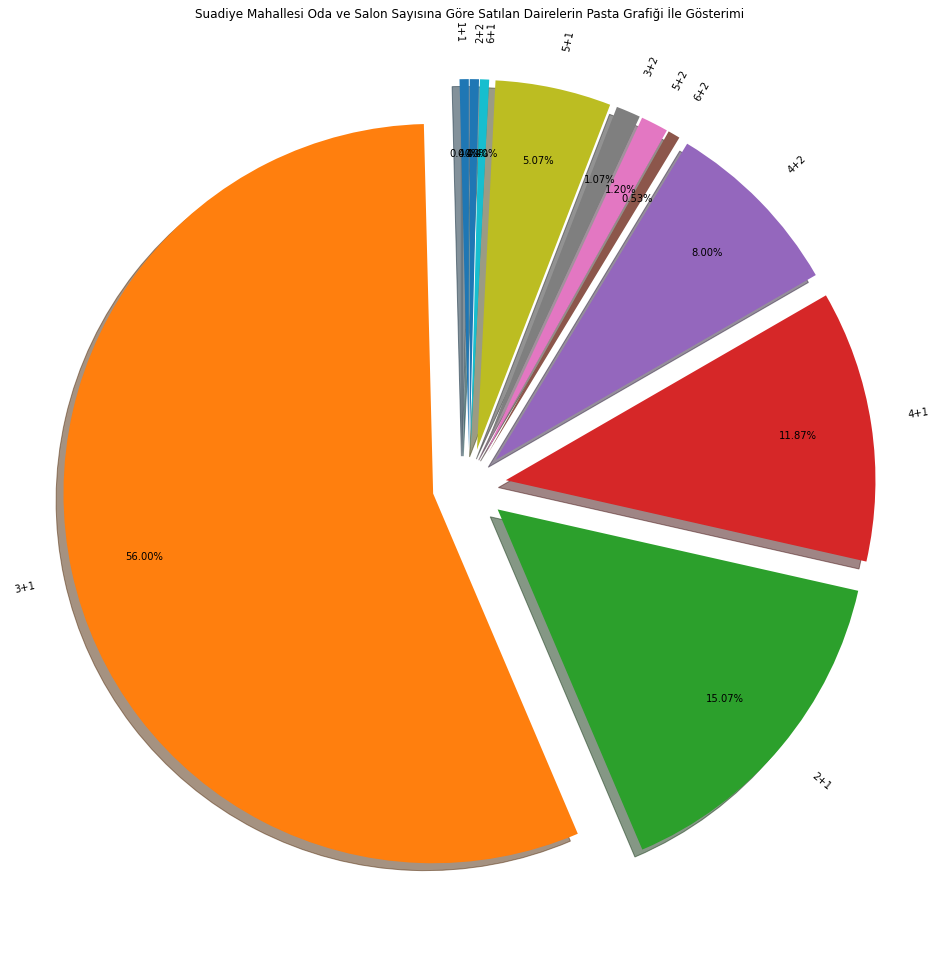

In [33]:
plt.figure(figsize=(17,17))
plt.pie(suadiye_istatistik, 
        labels=suadiye_istatistik.keys(),
        rotatelabels=True,
        startangle=90,
        autopct="%.2f%%",
        explode=[0.1]*len(suadiye_istatistik.keys()),
        shadow=True,
        radius=1,
        pctdistance=0.8
        )
plt.title("Suadiye Mahallesi Oda ve Salon Sayısına Göre Satılan Dairelerin Pasta Grafiği İle Gösterimi")
plt.show()

# REGRESSION

## Regression İşlemleri İçin Verisetinin Düzenlenmesi

In [34]:
r_df = df
r_df.head()

,Unnamed: 0,price,floor_area,age,floor,roof,room_num,hall_num,neighborhood,room_hall_num
0,0,2300000,75,0,14,0,1,1,SahrayıCedit Mahallesi,1+1
1,1,4690000,165,17,5,0,3,1,Feneryolu Mahallesi,3+1
2,2,6500000,145,5,7,0,3,1,Göztepe Mahallesi,3+1
3,3,6300000,165,15,10,0,3,1,Göztepe Mahallesi,3+1
4,4,5500000,145,12,1,0,3,1,Göztepe Mahallesi,3+1


In [35]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.drop(["room_hall_num"], axis=1, inplace=True)

In [36]:
r_df.head()

,price,floor_area,age,floor,roof,room_num,hall_num,neighborhood
0,2300000,75,0,14,0,1,1,SahrayıCedit Mahallesi
1,4690000,165,17,5,0,3,1,Feneryolu Mahallesi
2,6500000,145,5,7,0,3,1,Göztepe Mahallesi
3,6300000,165,15,10,0,3,1,Göztepe Mahallesi
4,5500000,145,12,1,0,3,1,Göztepe Mahallesi


### Normalizasyon işlemleri

In [37]:
neighborhood_dummies = pd.get_dummies(r_df["neighborhood"])
neighborhood_dummies

,19 Mayıs Mahallesi,Acıbadem Mahallesi,Bostancı Mahallesi,Caddebostan Mahallesi,Caferağa Mahallesi,Dumlupınar Mahallesi,Erenköy Mahallesi,Eğitim Mahallesi,Fenerbahçe Mahallesi,Feneryolu Mahallesi,...,Göztepe Mahallesi,Hasanpaşa Mahallesi,Kozyatağı Mahallesi,Koşuyolu Mahallesi,Merdivenköy Mahallesi,Osmanağa Mahallesi,Rasimpaşa Mahallesi,SahrayıCedit Mahallesi,Suadiye Mahallesi,Zühtüpaşa Mahallesi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4139,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
neighborhood_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   19 Mayıs Mahallesi      4142 non-null   uint8
 1   Acıbadem Mahallesi      4142 non-null   uint8
 2   Bostancı Mahallesi      4142 non-null   uint8
 3   Caddebostan Mahallesi   4142 non-null   uint8
 4   Caferağa Mahallesi      4142 non-null   uint8
 5   Dumlupınar Mahallesi    4142 non-null   uint8
 6   Erenköy Mahallesi       4142 non-null   uint8
 7   Eğitim Mahallesi        4142 non-null   uint8
 8   Fenerbahçe Mahallesi    4142 non-null   uint8
 9   Feneryolu Mahallesi     4142 non-null   uint8
 10  Fikirtepe Mahallesi     4142 non-null   uint8
 11  Göztepe Mahallesi       4142 non-null   uint8
 12  Hasanpaşa Mahallesi     4142 non-null   uint8
 13  Kozyatağı Mahallesi     4142 non-null   uint8
 14  Koşuyolu Mahallesi      4142 non-null   uint8
 15  Merdivenköy Mahallesi

In [39]:
r_df=pd.concat([r_df, neighborhood_dummies], axis=1)
r_df

,price,floor_area,age,floor,roof,room_num,hall_num,neighborhood,19 Mayıs Mahallesi,Acıbadem Mahallesi,...,Göztepe Mahallesi,Hasanpaşa Mahallesi,Kozyatağı Mahallesi,Koşuyolu Mahallesi,Merdivenköy Mahallesi,Osmanağa Mahallesi,Rasimpaşa Mahallesi,SahrayıCedit Mahallesi,Suadiye Mahallesi,Zühtüpaşa Mahallesi
0,2300000,75,0,14,0,1,1,SahrayıCedit Mahallesi,0,0,...,0,0,0,0,0,0,0,1,0,0
1,4690000,165,17,5,0,3,1,Feneryolu Mahallesi,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6500000,145,5,7,0,3,1,Göztepe Mahallesi,0,0,...,1,0,0,0,0,0,0,0,0,0
3,6300000,165,15,10,0,3,1,Göztepe Mahallesi,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5500000,145,12,1,0,3,1,Göztepe Mahallesi,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137,9500000,215,0,9,0,4,1,Suadiye Mahallesi,0,0,...,0,0,0,0,0,0,0,0,1,0
4138,12120000,200,0,10,0,4,1,Suadiye Mahallesi,0,0,...,0,0,0,0,0,0,0,0,1,0
4139,4300000,200,2,8,0,4,1,Erenköy Mahallesi,0,0,...,0,0,0,0,0,0,0,0,0,0
4140,10400000,110,0,10,0,3,1,Suadiye Mahallesi,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
r_df.drop(["neighborhood"], axis=1, inplace=True)
r_df.head()

,price,floor_area,age,floor,roof,room_num,hall_num,19 Mayıs Mahallesi,Acıbadem Mahallesi,Bostancı Mahallesi,...,Göztepe Mahallesi,Hasanpaşa Mahallesi,Kozyatağı Mahallesi,Koşuyolu Mahallesi,Merdivenköy Mahallesi,Osmanağa Mahallesi,Rasimpaşa Mahallesi,SahrayıCedit Mahallesi,Suadiye Mahallesi,Zühtüpaşa Mahallesi
0,2300000,75,0,14,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,4690000,165,17,5,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6500000,145,5,7,0,3,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,6300000,165,15,10,0,3,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5500000,145,12,1,0,3,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [41]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   price                   4142 non-null   int64
 1   floor_area              4142 non-null   int64
 2   age                     4142 non-null   int64
 3   floor                   4142 non-null   int64
 4   roof                    4142 non-null   int64
 5   room_num                4142 non-null   int64
 6   hall_num                4142 non-null   int64
 7   19 Mayıs Mahallesi      4142 non-null   uint8
 8   Acıbadem Mahallesi      4142 non-null   uint8
 9   Bostancı Mahallesi      4142 non-null   uint8
 10  Caddebostan Mahallesi   4142 non-null   uint8
 11  Caferağa Mahallesi      4142 non-null   uint8
 12  Dumlupınar Mahallesi    4142 non-null   uint8
 13  Erenköy Mahallesi       4142 non-null   uint8
 14  Eğitim Mahallesi        4142 non-null   uint8
 15  Fenerbahçe Mahallesi 

### Verilerin Parçalanması

In [42]:
y = r_df["price"]
x_data = r_df.drop(["price"], axis=1)

In [43]:
y

0        2300000
1        4690000
2        6500000
3        6300000
4        5500000
          ...   
4137     9500000
4138    12120000
4139     4300000
4140    10400000
4141     3650000
Name: price, Length: 4142, dtype: int64

In [44]:
x_data

,floor_area,age,floor,roof,room_num,hall_num,19 Mayıs Mahallesi,Acıbadem Mahallesi,Bostancı Mahallesi,Caddebostan Mahallesi,...,Göztepe Mahallesi,Hasanpaşa Mahallesi,Kozyatağı Mahallesi,Koşuyolu Mahallesi,Merdivenköy Mahallesi,Osmanağa Mahallesi,Rasimpaşa Mahallesi,SahrayıCedit Mahallesi,Suadiye Mahallesi,Zühtüpaşa Mahallesi
0,75,0,14,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,165,17,5,0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,145,5,7,0,3,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,165,15,10,0,3,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,145,12,1,0,3,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137,215,0,9,0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4138,200,0,10,0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4139,200,2,8,0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4140,110,0,10,0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Regression işlemleri için scaling işlemi

In [45]:
x = ( x_data - np.min(x_data) ) / ( np.max(x_data) - np.min(x_data) ).values
x

,floor_area,age,floor,roof,room_num,hall_num,19 Mayıs Mahallesi,Acıbadem Mahallesi,Bostancı Mahallesi,Caddebostan Mahallesi,...,Göztepe Mahallesi,Hasanpaşa Mahallesi,Kozyatağı Mahallesi,Koşuyolu Mahallesi,Merdivenköy Mahallesi,Osmanağa Mahallesi,Rasimpaşa Mahallesi,SahrayıCedit Mahallesi,Suadiye Mahallesi,Zühtüpaşa Mahallesi
0,0.064371,0.000000,1.000000,0.0,0.000000,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.199102,0.485714,0.357143,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.169162,0.142857,0.500000,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.199102,0.428571,0.714286,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.169162,0.342857,0.071429,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137,0.273952,0.000000,0.642857,0.0,0.428571,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4138,0.251497,0.000000,0.714286,0.0,0.428571,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4139,0.251497,0.057143,0.571429,0.0,0.428571,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4140,0.116766,0.000000,0.714286,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Eğitim ve test verilerini ayrıştırma

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=32)

In [47]:
x_train

,floor_area,age,floor,roof,room_num,hall_num,19 Mayıs Mahallesi,Acıbadem Mahallesi,Bostancı Mahallesi,Caddebostan Mahallesi,...,Göztepe Mahallesi,Hasanpaşa Mahallesi,Kozyatağı Mahallesi,Koşuyolu Mahallesi,Merdivenköy Mahallesi,Osmanağa Mahallesi,Rasimpaşa Mahallesi,SahrayıCedit Mahallesi,Suadiye Mahallesi,Zühtüpaşa Mahallesi
3095,0.206587,0.771429,0.142857,0.0,0.285714,1.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.131737,0.114286,0.214286,0.0,0.285714,0.25,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2945,0.154192,0.000000,0.214286,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,0.281437,0.171429,0.928571,0.0,0.428571,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4057,0.169162,0.600000,0.285714,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,0.154192,0.000000,0.071429,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2940,0.423653,0.114286,0.357143,1.0,0.285714,0.50,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1334,0.169162,0.000000,0.642857,0.0,0.285714,0.25,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1579,0.131737,0.885714,0.000000,0.0,0.142857,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
y_train

3095     3595000
7        3950000
2945     4690000
2221     6750000
4057     4295000
          ...   
4030     3825000
2940    11850000
1334     7595000
1579     1650000
2775     7100000
Name: price, Length: 3520, dtype: int64

In [49]:
x_test

,floor_area,age,floor,roof,room_num,hall_num,19 Mayıs Mahallesi,Acıbadem Mahallesi,Bostancı Mahallesi,Caddebostan Mahallesi,...,Göztepe Mahallesi,Hasanpaşa Mahallesi,Kozyatağı Mahallesi,Koşuyolu Mahallesi,Merdivenköy Mahallesi,Osmanağa Mahallesi,Rasimpaşa Mahallesi,SahrayıCedit Mahallesi,Suadiye Mahallesi,Zühtüpaşa Mahallesi
2481,0.131737,0.000000,0.642857,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2953,0.229042,0.628571,0.357143,0.0,0.428571,0.25,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1044,0.326347,1.000000,0.285714,0.0,0.428571,0.25,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3694,0.161677,0.714286,0.285714,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
387,0.139222,0.085714,0.357143,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.146707,0.142857,0.500000,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2707,0.378743,0.114286,0.642857,0.0,0.571429,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
163,0.154192,0.742857,0.357143,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3855,0.251497,0.028571,0.571429,0.0,0.428571,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
y_test

2481     5250000
2953     4895000
1044     8250000
3694     4950000
387      4000000
          ...   
295      3850000
2707    12000000
163      3650000
3855     6800000
1001     2750000
Name: price, Length: 622, dtype: int64

### Regression İşlemleri

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [52]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=100, random_state=32)

In [55]:
# Eğitim
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=32)

In [56]:
# Test verileri ile tahmin yaptırma

lr_tahmin = lr.predict(x_test)
dt_tahmin = dt.predict(x_test)
rf_tahmin = rf.predict(x_test)

In [57]:
for i in lr_tahmin:
    print(i)

6774784.0
5324800.0
8851456.0
4079616.0
4173824.0
3948544.0
5296128.0
14581760.0
3665920.0
3719168.0
6623232.0
221184.0
7086080.0
1486848.0
5050368.0
4403200.0
4243456.0
3612672.0
1097728.0
6123520.0
5177344.0
6393856.0
6545408.0
5070848.0
5357568.0
2248704.0
3948544.0
5558272.0
1368064.0
2932736.0
2428928.0
5849088.0
4759552.0
847872.0
4411392.0
11190272.0
2883584.0
8216576.0
4767744.0
6275072.0
2428928.0
6033408.0
3973120.0
1183744.0
4132864.0
9973760.0
5652480.0
9887744.0
4702208.0
4427776.0
6238208.0
6275072.0
2494464.0
4218880.0
6545408.0
6488064.0
4628480.0
2269184.0
7299072.0
8884224.0
12378112.0
2658304.0
5480448.0
5267456.0
6115328.0
-614400.0
3706880.0
7761920.0
5918720.0
6914048.0
5599232.0
2600960.0
6979584.0
4055040.0
5533696.0
6819840.0
4702208.0
10608640.0
5529600.0
1429504.0
4268032.0
8839168.0
3973120.0
2281472.0
5595136.0
4898816.0
1675264.0
6316032.0
3440640.0
3526656.0
-241664.0
7282688.0
7008256.0
7360512.0
6037504.0
5328896.0
3334144.0
1884160.0
2428928.0
11407360

### Regression Skorları

In [58]:
lr_mse = mean_squared_error(lr_tahmin, y_test)
dt_mse = mean_squared_error(dt_tahmin, y_test)
rf_mse = mean_squared_error(rf_tahmin, y_test)

print("Linear Regression için Mean Square Error = ", lr_mse)
print("Decision Tree için Mean Square Error= ", dt_mse)
print("Random Forest için Mean Square Error= ", rf_mse)
print("")
print("linear için R Square: ", lr.score(x_test, y_test))
print("Decision Tree için R Square: ", dt.score(x_test, y_test))
print("Random Forest için R Square= ", rf.score(x_test, y_test))

Linear Regression için Mean Square Error =  6756170002152.334
Decision Tree için Mean Square Error=  3112459815630.551
Random Forest için Mean Square Error=  2274027628347.5073

linear için R Square:  0.5399726067790708
Decision Tree için R Square:  0.7880727135295178
Random Forest için R Square=  0.8451615335837003


In [59]:
x_test

,floor_area,age,floor,roof,room_num,hall_num,19 Mayıs Mahallesi,Acıbadem Mahallesi,Bostancı Mahallesi,Caddebostan Mahallesi,...,Göztepe Mahallesi,Hasanpaşa Mahallesi,Kozyatağı Mahallesi,Koşuyolu Mahallesi,Merdivenköy Mahallesi,Osmanağa Mahallesi,Rasimpaşa Mahallesi,SahrayıCedit Mahallesi,Suadiye Mahallesi,Zühtüpaşa Mahallesi
2481,0.131737,0.000000,0.642857,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2953,0.229042,0.628571,0.357143,0.0,0.428571,0.25,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1044,0.326347,1.000000,0.285714,0.0,0.428571,0.25,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3694,0.161677,0.714286,0.285714,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
387,0.139222,0.085714,0.357143,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.146707,0.142857,0.500000,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2707,0.378743,0.114286,0.642857,0.0,0.571429,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
163,0.154192,0.742857,0.357143,0.0,0.285714,0.25,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3855,0.251497,0.028571,0.571429,0.0,0.428571,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Orijinal ve Tahmin Değerlerini Grafik İle Karşılaştırma

### Linear Regression Tahmin Grafiği

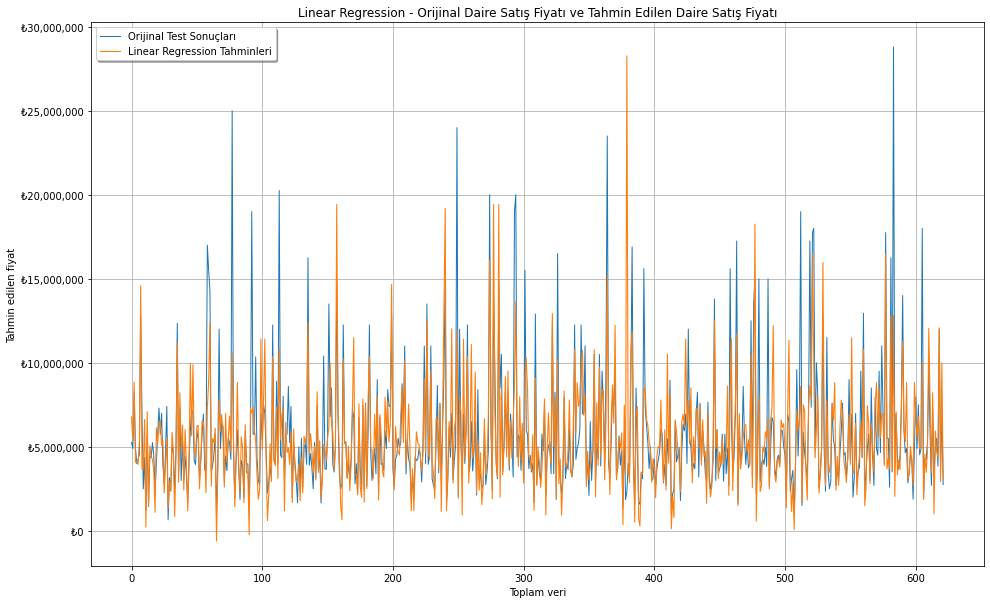

In [60]:
x_ax = range(len(y_test))
plt.figure(figsize=(16,10))
plt.plot(x_ax, y_test, linewidth=1, label="Orijinal Test Sonuçları")
plt.plot(x_ax, lr_tahmin, linewidth=1.1, label="Linear Regression Tahminleri")
plt.title("Linear Regression - Orijinal Daire Satış Fiyatı ve Tahmin Edilen Daire Satış Fiyatı")
plt.xlabel('Toplam veri')
plt.ylabel('Tahmin edilen fiyat')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₺{x:,.0f}'))
plt.show() 

### Decision Tree Tahmin Grafiği

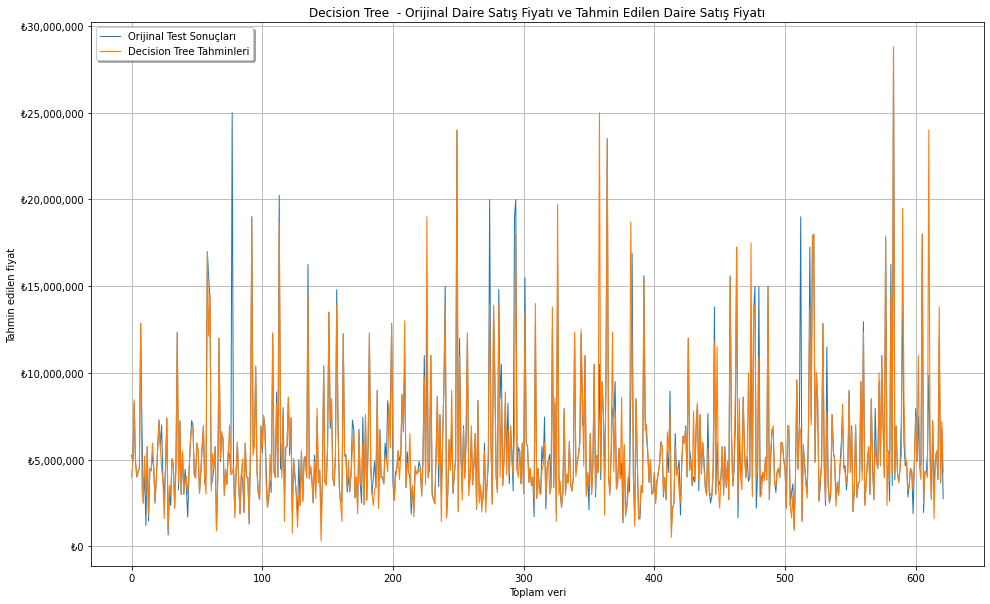

In [61]:
x_ax = range(len(y_test))
plt.figure(figsize=(16,10))
plt.plot(x_ax, y_test, linewidth=1, label="Orijinal Test Sonuçları")
plt.plot(x_ax, dt_tahmin, linewidth=1.1, label="Decision Tree Tahminleri")
plt.title("Decision Tree  - Orijinal Daire Satış Fiyatı ve Tahmin Edilen Daire Satış Fiyatı")
plt.xlabel('Toplam veri')
plt.ylabel('Tahmin edilen fiyat')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₺{x:,.0f}'))
plt.show() 

### Random Forest Tahmin Grafiği

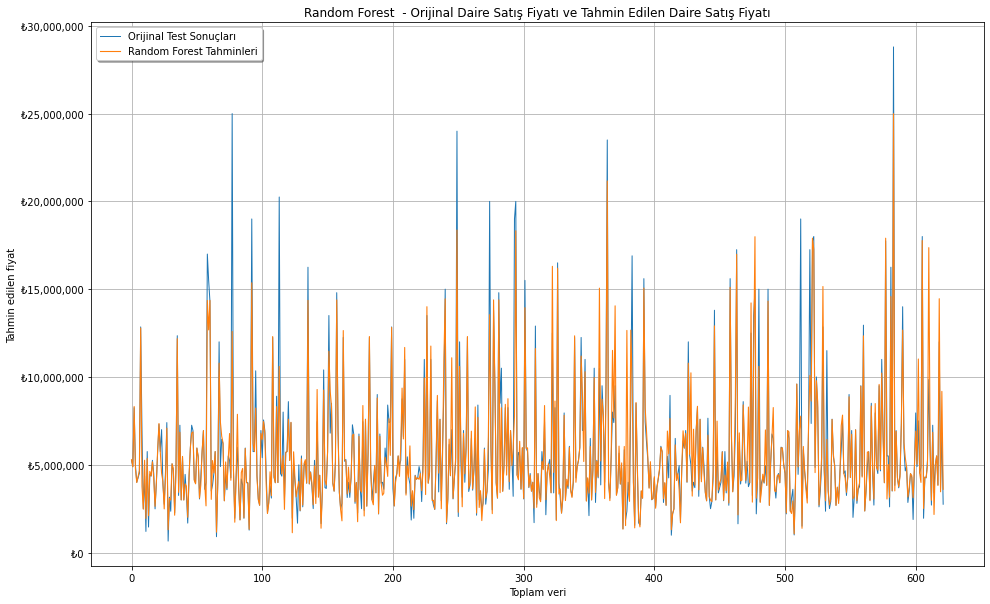

In [62]:
x_ax = range(len(y_test))
plt.figure(figsize=(16,10))
plt.plot(x_ax, y_test, linewidth=1, label="Orijinal Test Sonuçları")
plt.plot(x_ax, rf_tahmin, linewidth=1.1, label="Random Forest Tahminleri")
plt.title("Random Forest  - Orijinal Daire Satış Fiyatı ve Tahmin Edilen Daire Satış Fiyatı")
plt.xlabel('Toplam veri')
plt.ylabel('Tahmin edilen fiyat')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₺{x:,.0f}'))
plt.show() 

## Orijinal ve Tahmin Değerlerini Oranlayarak Pasta Grafiği İle Karşılaştırma

In [64]:
orj_ort = sum(y_test)/len(y_test)
lr_tahmin_ort = sum(lr_tahmin)/len(lr_tahmin)
dt_tahmin_ort = sum(dt_tahmin)/len(dt_tahmin)
rf_tahmin_ort = sum(rf_tahmin)/len(rf_tahmin)

print("orj_ort: ", orj_ort)
print("Lr tahmin ort: ", lr_tahmin_ort)
print("Dt tahmin ort: ", dt_tahmin_ort)
print("rf tahmin ort: ", rf_tahmin_ort)

orj_ort:  5719855.3054662375
Lr tahmin ort:  5635009.4405144695
Dt tahmin ort:  5668138.413078525
rf tahmin ort:  5673100.30228339


### Linear Regression için Pasta Grafiği

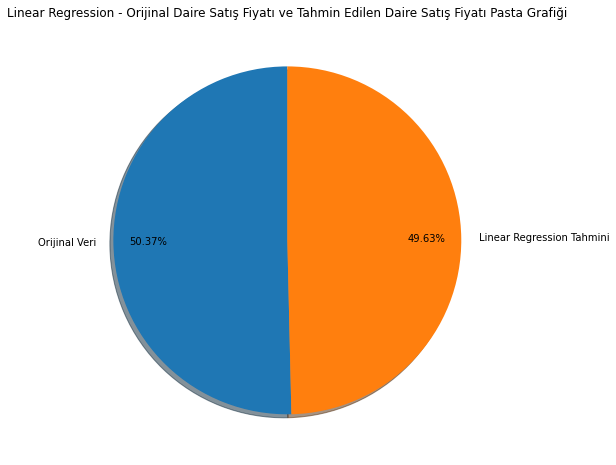

In [65]:
plt.figure(figsize=(8,8))
plt.pie([orj_ort, lr_tahmin_ort], 
        labels=["Orijinal Veri", "Linear Regression Tahmini"],
        startangle=90,
        autopct="%.2f%%",
        shadow=True,
        radius=1,
        pctdistance=0.8
        )
plt.title("Linear Regression - Orijinal Daire Satış Fiyatı ve Tahmin Edilen Daire Satış Fiyatı Pasta Grafiği")
plt.show()

### Decision Tree İçin Pasta Grafiği

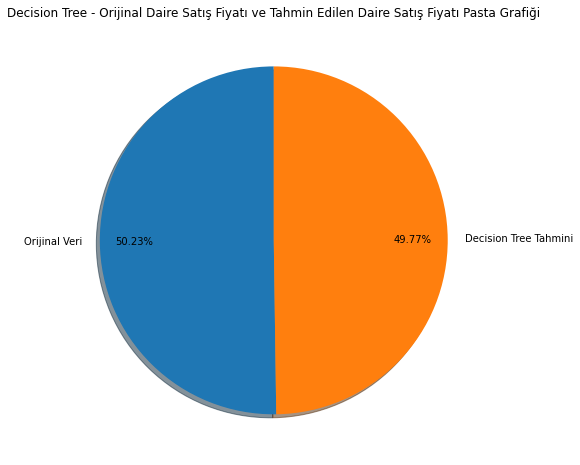

In [66]:
plt.figure(figsize=(8,8))
plt.pie([orj_ort, dt_tahmin_ort], 
        labels=["Orijinal Veri", "Decision Tree Tahmini"],
        startangle=90,
        autopct="%.2f%%",
        shadow=True,
        radius=1,
        pctdistance=0.8
        )
plt.title("Decision Tree - Orijinal Daire Satış Fiyatı ve Tahmin Edilen Daire Satış Fiyatı Pasta Grafiği")
plt.show()

### Random Forest İçin Pasta Grafiği

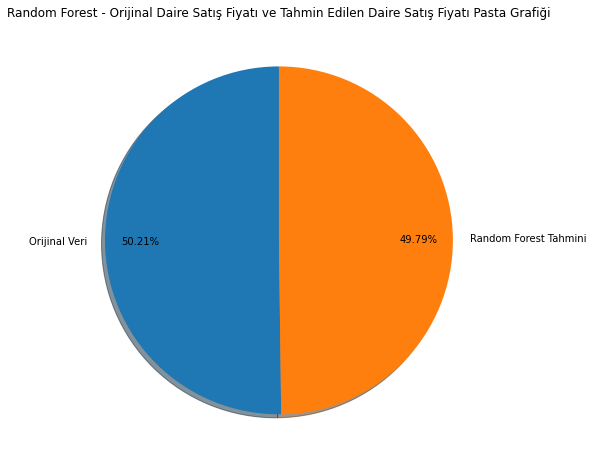

In [67]:
plt.figure(figsize=(8,8))
plt.pie([orj_ort, rf_tahmin_ort], 
        labels=["Orijinal Veri", "Random Forest Tahmini"],
        startangle=90,
        autopct="%.2f%%",
        shadow=True,
        radius=1,
        pctdistance=0.8
        )
plt.title("Random Forest - Orijinal Daire Satış Fiyatı ve Tahmin Edilen Daire Satış Fiyatı Pasta Grafiği")
plt.show()

### Bar Grafiği ile Karşılaştırma

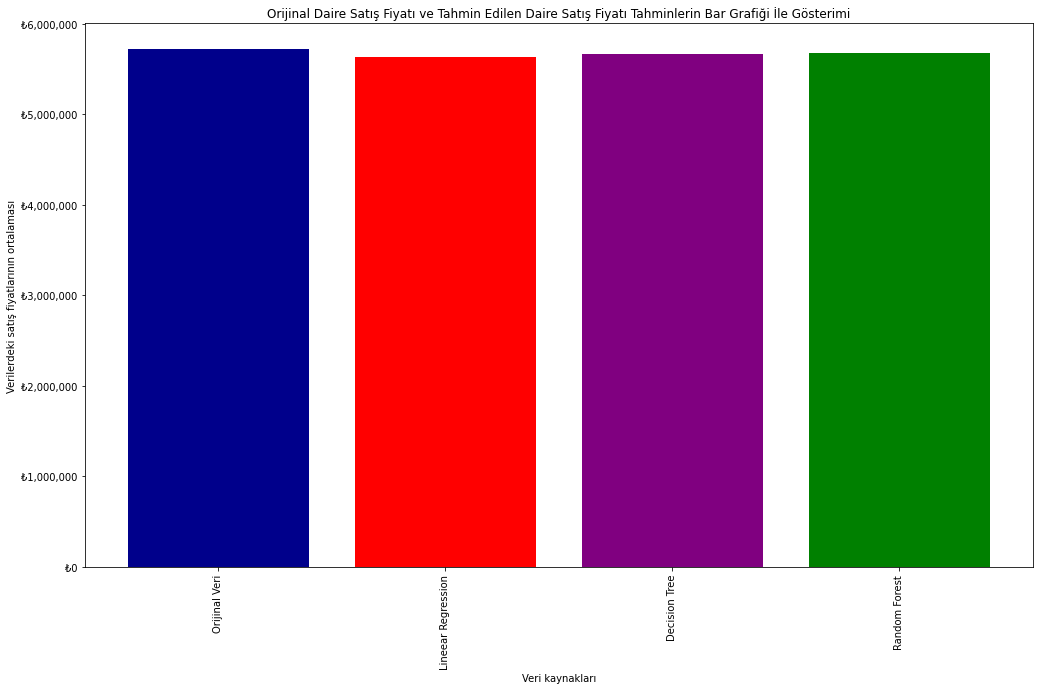

In [68]:
plt.figure(figsize=(17,10))
plt.bar(["Orijinal Veri", "Lineear Regression", "Decision Tree", "Random Forest"], [orj_ort, lr_tahmin_ort, dt_tahmin_ort, rf_tahmin_ort], color=['darkblue', 'red', 'purple', 'green'])
plt.xticks(rotation=90)
plt.xlabel("Veri kaynakları")
plt.ylabel("Verilerdeki satış fiyatlarının ortalaması")
plt.title("Orijinal Daire Satış Fiyatı ve Tahmin Edilen Daire Satış Fiyatı Tahminlerin Bar Grafiği İle Gösterimi")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₺{x:,.0f}'))
plt.show()

# BİTİŞ